# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
import datasets
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
#(0.1307,),(0.3081,) values are from mean and standart deviation respectively of whole MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root='data',train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(training_data,batch_size=64,shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root='data',train=False,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(training_data,batch_size=64,shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?



**DOUBLE CLICK THIS CELL TO MODIFY**
Answer: Normalizing data can help networks train better.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        print("SHAPE OF IMAGE",image.shape)
        plt.rcParams["figure.figsize"] = (10,3)
        plt.imshow(image.T.squeeze().T,cmap='gray')
        plt.show()

3
SHAPE OF IMAGE (1, 28, 28)


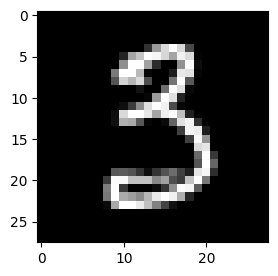

0
SHAPE OF IMAGE (1, 28, 28)


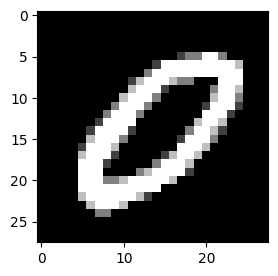

5
SHAPE OF IMAGE (1, 28, 28)


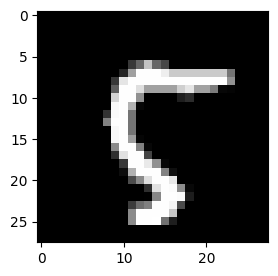

1
SHAPE OF IMAGE (1, 28, 28)


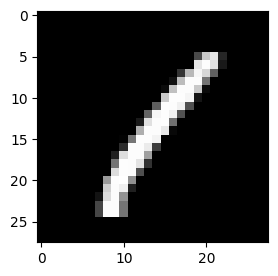

5
SHAPE OF IMAGE (1, 28, 28)


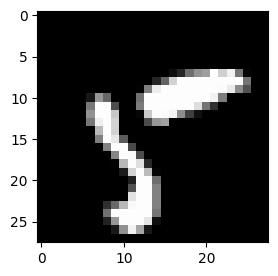

In [4]:
# Explore data
show5(train_loader)

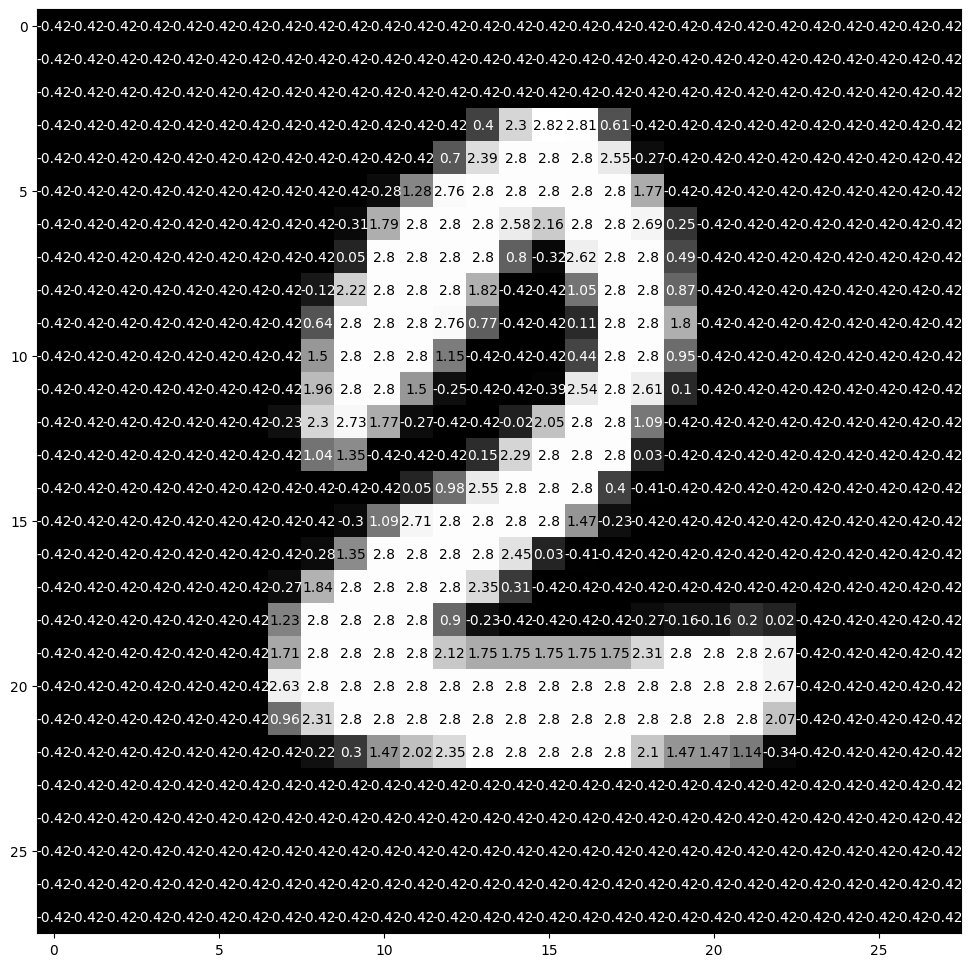

In [5]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        x = F.gelu(self.fc1(x))
        x = self.dropout(x)
        x = F.gelu(self.fc2(x))
        x = self.dropout(x)
        x = F.gelu(self.fc3(x))
        return x

# initialize the NN
model = Net()
if torch.cuda.is_available():
    model.to('cuda')
    print("Running Device is CUDA")

print("MODEL: \n",model)

## Specify loss and optimization functions
# specify loss function
criterion = nn.CrossEntropyLoss()
# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

Running Device is CUDA
MODEL: 
 Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)


## Why GeLU insted of ReLu
Actually just I want to see performance of GeLU on simple task.
I normalized the dataset. Pixel values mapped in to -1 and 1 values as you can see in the image above. I have small ranges in the dataset and negative values. That's why I select GeLU activation function.

#### From Stackoverflow comment
"gelu is smoother near zero and "is differentiable in all ranges, and allows to have gradients(although small) in negative range" which helps with the problem."

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [7]:
def train(epoch,loss_vector, log_interval=200):
    # Set model to training mode
    model.train()
    train_loss = 0
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to('cuda')
        target = target.to('cuda')

        # Zero gradient buffers
        optimizer.zero_grad()

        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        train_loss = criterion(output,target).data.item()

        # Backpropagate
        loss.backward()

        # Update weights
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data.item()))


    train_loss /= len(train_loader)
    loss_vector.append(train_loss)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [8]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in test_loader:
        data = data.to('cuda')
        target = target.to('cuda')
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(test_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(test_loader.dataset)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(test_loader.dataset), accuracy))

In [9]:
%%time
epochs = 10

lossv, accv = [], []
losst = []
for epoch in range(1, epochs + 1):
    train(epoch,losst)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307621
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.569212
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.239481
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.215848
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.290314

Validation set: Average loss: 0.1842, Accuracy: 56664/60000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.211485
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.276973
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.267485
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.211637
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.107948

Validation set: Average loss: 0.1149, Accuracy: 57951/60000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.158587
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.173280
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.130299
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.041725
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.074690

Validation set: Average loss: 0.0870, Accuracy: 58434/60000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.091163
Train Epoch: 4 [

## Plot Training Graphs
Plot the training loss (and validation loss/accuracy, if recorded).

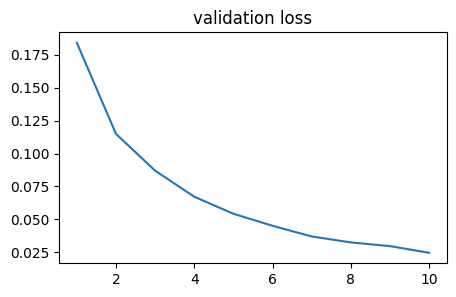

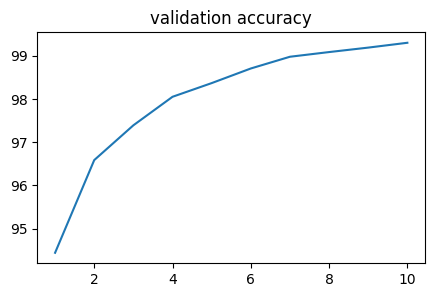

In [10]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

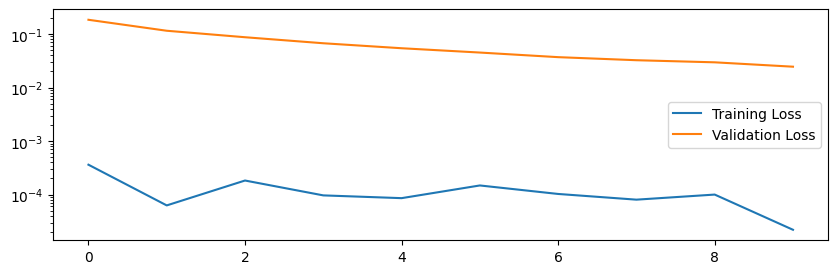

In [18]:
plt.plot(losst, label="Training Loss")
plt.plot(lossv, label="Validation Loss")
plt.yscale('log')
plt.legend()
plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:
torch.save(model,'./trainedModel.pth')

In [19]:
#Load The Model from Disk
trained_model = torch.load('./trainedModel.pth')
trained_model.eval()
test_acc = 0.0
for samples, labels in test_loader:
    with torch.no_grad():
        samples, labels = samples.cuda(), labels.cuda()
        output = trained_model(samples)
        # calculate accuracy
        pred = torch.argmax(output, dim=1)
        correct = pred.eq(labels)
        test_acc += torch.mean(correct.float())
print('Accuracy of the network on {} test images: {}%'.format(len(test_data), round(test_acc.item()*100.0/len(test_loader), 2)))


Accuracy of the network on 10000 test images: 99.3%
